<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cut-In-Scenario" data-toc-modified-id="Cut-In-Scenario-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cut-In Scenario</a></span><ul class="toc-item"><li><span><a href="#Collision-Scenarios" data-toc-modified-id="Collision-Scenarios-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Collision Scenarios</a></span><ul class="toc-item"><li><span><a href="#entropy.A" data-toc-modified-id="entropy.A-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>entropy.A</a></span></li><li><span><a href="#max(decel.mps.A)" data-toc-modified-id="max(decel.mps.A)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>max(decel.mps.A)</a></span></li><li><span><a href="#max(decel.mps.A)" data-toc-modified-id="max(decel.mps.A)-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>max(decel.mps.A)</a></span></li></ul></li></ul></li></ul></div>

# Cut-In Scenario 

In [1]:
%%capture
import utils
import constants
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class ScenarioStats:
    def __init__(self, scenario : str):
        self.scenario = scenario

        work_dir = "results/%s" % scenario
        param_df = pd.read_csv("%s/param_hist.csv" % work_dir)
        score_df = pd.read_csv("%s/score_hist.csv" % work_dir)

        # Combine Dataframes
        self.df = pd.concat([param_df,score_df], axis = 1, sort=False)

In [3]:
ss = ScenarioStats(constants.scenario.cut_in)
ss.df.head()

,s0.A,s0.B,s0.C,dist.BA,dist.CA,lane_change_dur,collision.A,entropy.A,max(decel.mps.A),max(decel.normal.A),min(dtc.m.AB),min(dtc.m.AC),min(ttc.s.AB),min(ttc.s.AC),pdf(traj.C)
0,2.16,14.04,1.08,11.0,29.0,4.7,0.0,7.607252,0.57339,0.12742,10.219610,28.329382,3.169338,7.592219,0.369712
1,14.04,3.51,12.69,26.0,6.0,1.7,1.0,8.270137,9.00000,2.00000,19.168799,0.000000,1.812472,0.000000,0.226159
2,3.78,13.77,10.53,28.0,14.0,4.6,0.0,6.560499,1.11064,0.24681,25.527740,11.672217,6.771412,3.145785,0.368477
3,11.61,14.04,14.31,14.0,6.0,0.7,1.0,7.283122,9.00000,2.00000,11.244383,0.000000,1.153629,0.000000,0.013014
4,14.85,0.54,9.72,21.0,30.0,1.1,0.0,5.633020,8.78736,1.95275,8.770957,19.489889,1.357674,1.995088,0.101570


## Collision Scenarios

In [4]:
df = ss.df[ss.df["collision.A"] > 0]
df.head()

,s0.A,s0.B,s0.C,dist.BA,dist.CA,lane_change_dur,collision.A,entropy.A,max(decel.mps.A),max(decel.normal.A),min(dtc.m.AB),min(dtc.m.AC),min(ttc.s.AB),min(ttc.s.AC),pdf(traj.C)
1,14.04,3.51,12.69,26.0,6.0,1.7,1.0,8.270137,9.0,2.0,19.168799,0.000000,1.812472,0.000000,0.226159
3,11.61,14.04,14.31,14.0,6.0,0.7,1.0,7.283122,9.0,2.0,11.244383,0.000000,1.153629,0.000000,0.013014
5,1.35,12.42,0.27,24.0,6.0,0.6,1.0,3.675163,9.0,2.0,23.840617,0.000000,15.116554,0.000000,0.003703
16,12.15,4.32,6.75,11.0,7.0,3.9,1.0,9.198788,9.0,2.0,0.000000,4.929979,0.000000,0.547775,0.357202
17,14.31,5.94,7.29,21.0,12.0,2.9,1.0,9.180966,9.0,2.0,12.690840,0.000000,1.414466,0.000000,0.326662


In [8]:
lattice_fig_size = [5,5]
dpi = 100

### entropy.A

<Figure size 432x288 with 0 Axes>

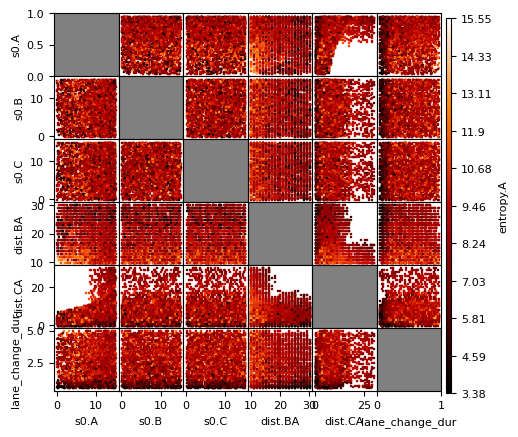

In [9]:
utils.lattice_plot(
    df,
    features = constants.features[ss.scenario],
    score_feat = "entropy.A",
    fig_size = lattice_fig_size,
    dpi = dpi
)

### max(decel.mps.A)

<Figure size 432x288 with 0 Axes>

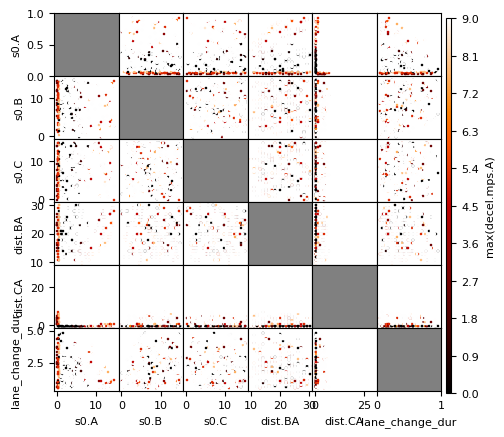

In [10]:
utils.lattice_plot(
    df,
    features = constants.features[ss.scenario],
    score_feat = "max(decel.mps.A)",
    fig_size = lattice_fig_size,
    dpi = dpi
)